# Percobaan II
Nama : Muhammad Fadhil Syahputra

NIM : 2211014210002

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa 
from IPython.display import Audio
from itertools import cycle


everforest_colors = ['#f85552', '#dfa000', '#8da101', '#3a94c5']
color_cycle = cycle(everforest_colors)

## Sampling


### Pengamatan Pengaruh Pemilihan Frekuensi Sampling Secara Visual






1. Bangkitkan sebuah gelombang sinus diskrit mengikuti script seperti pada praktikum 1
langkah 4.5.5 no.1, dengan Fs = 10 Hz, t = (0:Fs-1)/Fs , amplitudo = 1, dan f = 2 Hz.
Bagaimana hasilnya ? Pada gambar sinyal yang dihasilkan, jangan lupa beri keterangan
besar frekuensi sampling yang digunakan.

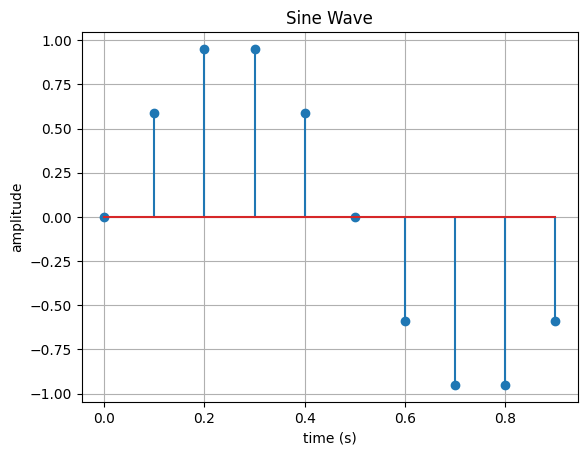

In [3]:
amp = 1
freq = 1
sampling_freq = 10
t = np.arange(0, 1, 1/sampling_freq)
signal = amp * np.sin(2 * np.pi * freq * t)
fig, ax = plt.subplots()
ax.stem(t, signal)
ax.set(xlabel='time (s)', ylabel='amplitude',
       title='Sine Wave')
ax.grid()
plt.show()


2. Lakukan perubahan pada nilai Fs, pada sinyal s1 sehingga bernilai 12, 16, 18, 20, dan Catat apa yang terjadi ? Apa pengaruh jumlah sampel berbeda untuk satu periode
sinyal terbangkit?

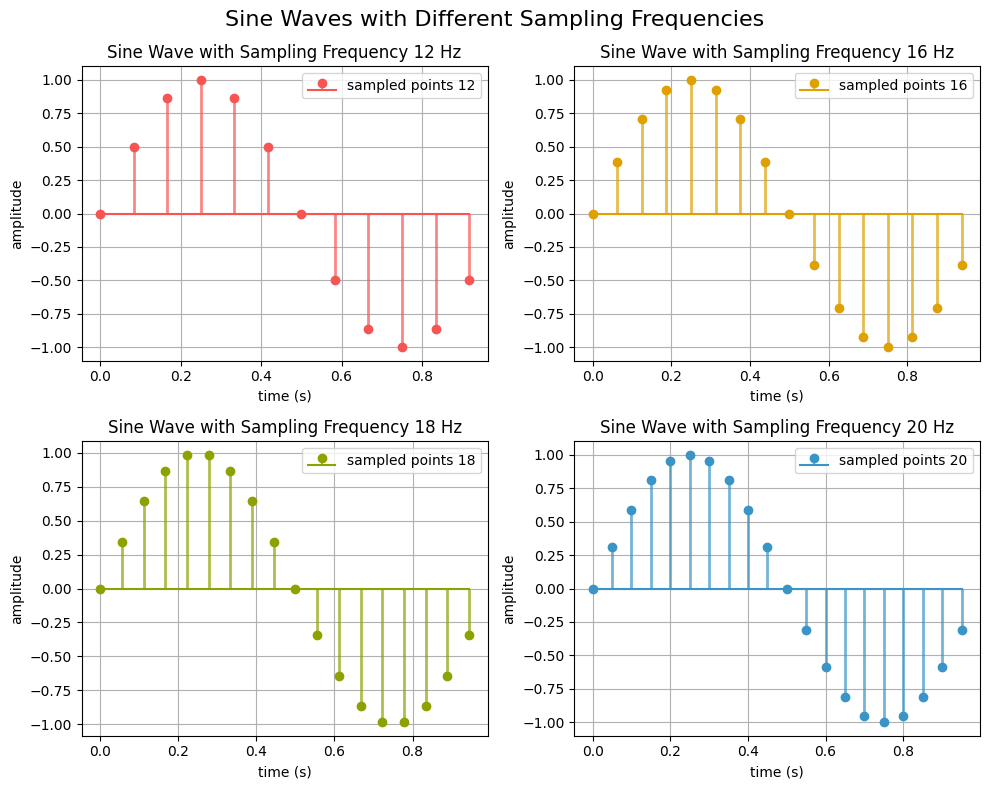

In [4]:
sampling_freqs = [12, 16, 18, 20]
everforest_colors = ['#f85552', '#dfa000', '#8da101', '#3a94c5']
fig, axs = plt.subplots(2,2, figsize=(10, 8))
fig.suptitle('Sine Waves with Different Sampling Frequencies', fontsize=16)
axs = axs.flatten()

for i,(sampling_freq, color) in enumerate(zip(sampling_freqs, everforest_colors)):
    t = np.arange(0, 1, 1/sampling_freq)
    signal = amp * np.sin(2 * np.pi * freq * t)
    markerline, stemlines, baseline = axs[i].stem(t, signal, linefmt=color, markerfmt='o', label=f'sampled points {len(signal)}')
    markerline.set_markerfacecolor(color)
    markerline.set_markeredgecolor(color)
    stemlines.set_color(color)
    stemlines.set_linewidth(2)
    stemlines.set_alpha(0.7)
    baseline.set_color(color)
    axs[i].set(xlabel='time (s)', ylabel='amplitude',
               title=f'Sine Wave with Sampling Frequency {sampling_freq} Hz')
    axs[i].grid()
    axs[i].legend(loc='best')
plt.tight_layout()
plt.show()


### Pengamatan Pengaruh Pemilihan Frekuensi Sampling pada Efek Audio

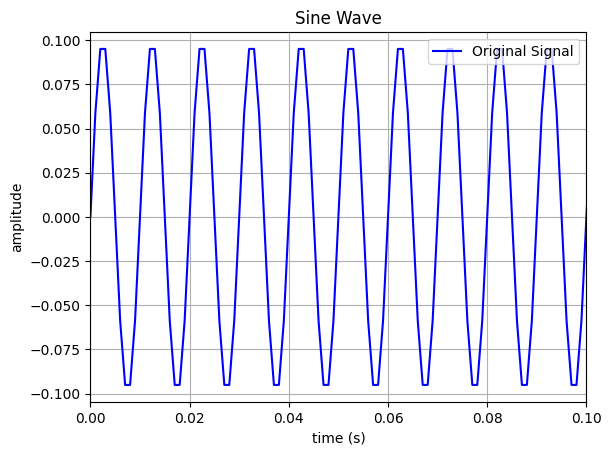

In [5]:
sampling_freq = 1000
freq = 100
t = np.arange(0, 1, 1/sampling_freq)
signal =  0.1*np.sin(2 * np.pi * freq * t)
fig, ax = plt.subplots()
ax.plot(t, signal, color='blue', label='Original Signal')
ax.set(xlabel='time (s)', ylabel='amplitude',
       title='Sine Wave')
ax.grid()
ax.set_xlim(0, 0.1)
plt.legend()
plt.show()

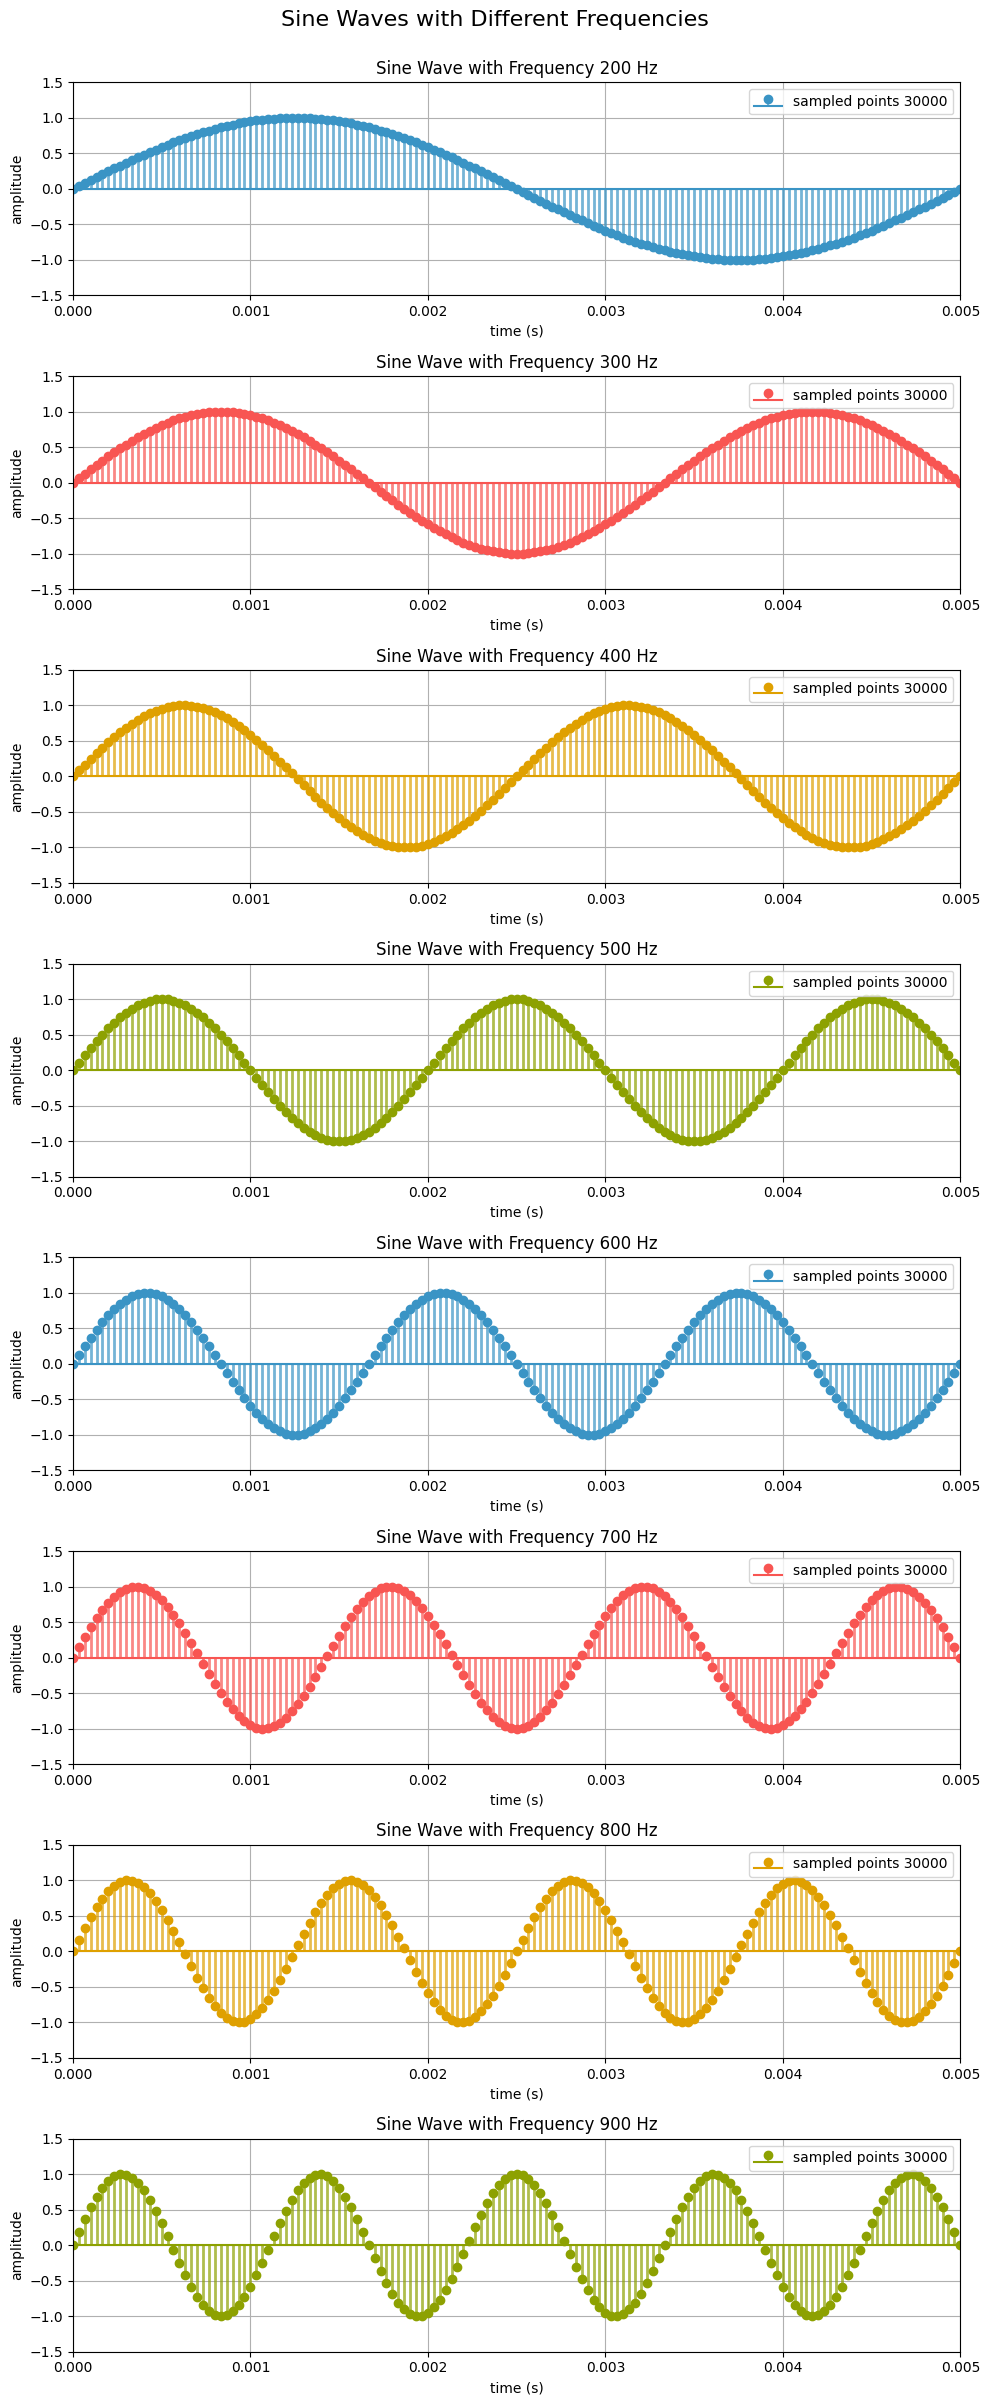

In [32]:
freq = [i*100 for i in range(2, 10)]
sampling_freq = 30000

fig, axs = plt.subplots(8,1)
fig.set_size_inches(10, 24)
fig.suptitle('Sine Waves with Different Frequencies', fontsize=16, y=1)
axs = axs.flatten()
for i, f in enumerate(freq):
    t = np.arange(0, 1, 1/sampling_freq)
    signal = 1*np.sin(2 * np.pi * f * t)
    color = next(color_cycle)
    markerline, stemlines, baseline = axs[i].stem(t, signal, linefmt=color, markerfmt='o', label=f'sampled points {len(signal)}')
    markerline.set_markerfacecolor(color)
    markerline.set_markeredgecolor(color)
    stemlines.set_color(color)
    stemlines.set_linewidth(2)
    stemlines.set_alpha(0.7)
    baseline.set_color(color)
    axs[i].set(xlabel='time (s)', ylabel='amplitude',
               title=f'Sine Wave with Frequency {f} Hz')
    axs[i].grid()
    axs[i].legend(loc='best')
    axs[i].set_xlim(0, 0.005)
    axs[i].set_ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()




### Pengamatan Efek Aliasing pada Audio 1

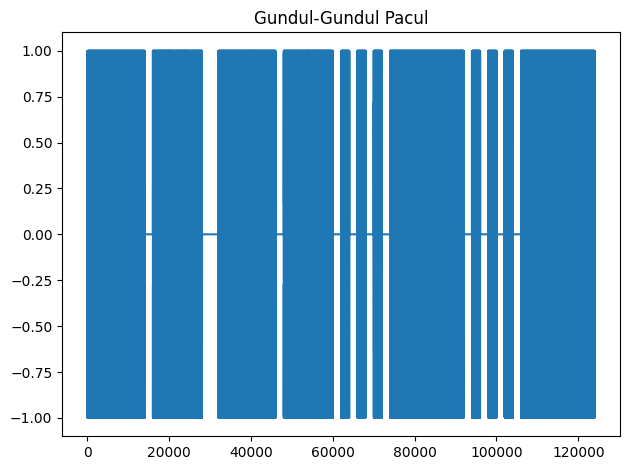

In [7]:

plt.figure("Lagu Gundul-Gundul Pacul")

Fs = 8000  
t = np.arange(0, 0.25, 1/Fs)  

c  = np.sin(2 * np.pi * 262 * t)
d  = np.sin(2 * np.pi * 294 * t)
e  = np.sin(2 * np.pi * 330 * t)
f_ = np.sin(2 * np.pi * 249 * t)
g  = np.sin(2 * np.pi * 392 * t)
a  = np.sin(2 * np.pi * 440 * t)
b  = np.sin(2 * np.pi * 494 * t)
c1 = np.sin(2 * np.pi * 523 * t)

nol = np.zeros_like(t)

nada1 = np.concatenate([c,e,c,e,f_,g,g,nol,b,c1,b,c1,b,g,nol,nol])
nada2 = np.concatenate([c,e,c,e,f_,g,g,nol,b,c1,b,c1,b,g,nol])
nada3 = np.concatenate([c,nol,e,nol,g,nol,f_,f_,g,f_,e,c,f_,e,c,nol])
nada4 = np.concatenate([c,nol,e,nol,g,nol,f_,f_,g,f_,e,c,f_,e,c])

lagu = np.concatenate([nada1, nada2, nada3, nada4])

plt.plot(lagu)
plt.title("Gundul-Gundul Pacul")
plt.tight_layout()
plt.show()

Audio(lagu, rate=Fs)


### Pengamatan Efek Aliasing pada Audio 2

In [8]:
y, sr = librosa.load('./audio.mp3', sr=None)

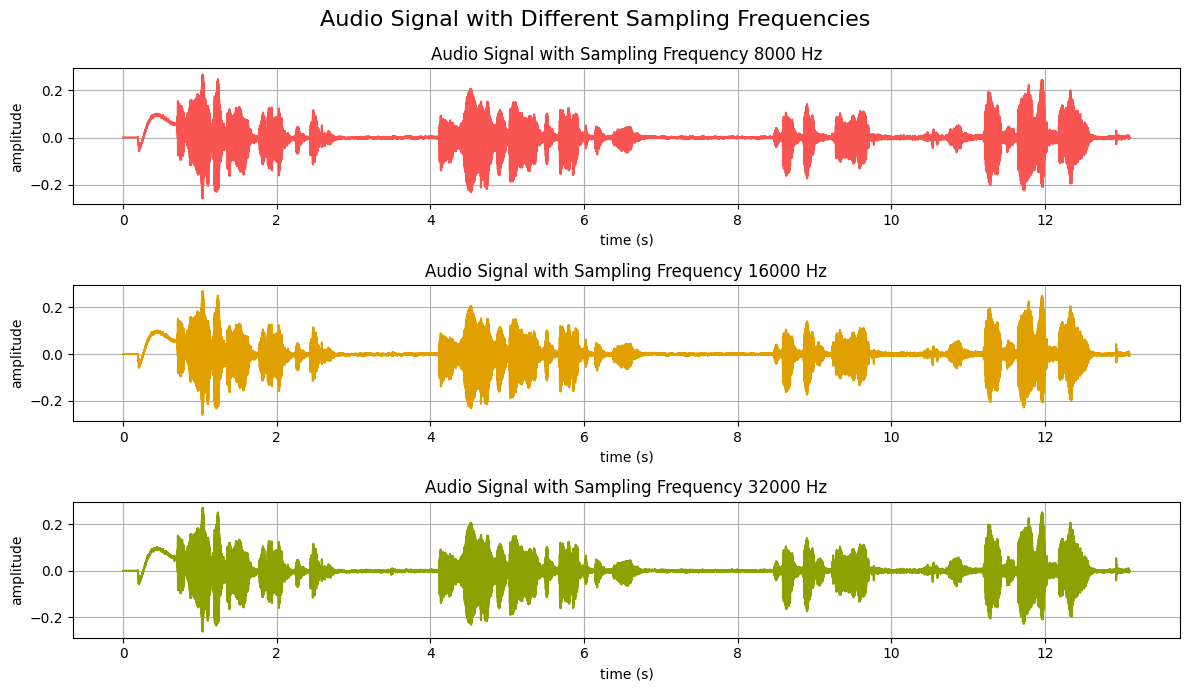

In [9]:
sampling_freqs = [8000, 16000, 32000]
everforest_colors = ['#f85552', '#dfa000', '#8da101']
fig, axs = plt.subplots(3,1)
fig.set_size_inches(12, 7)
fig.suptitle('Audio Signal with Different Sampling Frequencies', fontsize=16)
y_resampleds = []

y_resampled = librosa.resample(y, orig_sr=sr, target_sr=sampling_freqs[0])
t = np.arange(0, len(y_resampled)) / sampling_freqs[0]
y_resampleds.append({
    'y': y_resampled,
    'sr': sampling_freqs[0],
})

axs[0].plot(t, y_resampled, color=everforest_colors[0])
axs[0].set(xlabel='time (s)', ylabel='amplitude',
           title=f'Audio Signal with Sampling Frequency {sampling_freqs[0]} Hz')
axs[0].grid()
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=sampling_freqs[1])
t = np.arange(0, len(y_resampled)) / sampling_freqs[1]
y_resampleds.append({
    'y': y_resampled,
    'sr': sampling_freqs[1],
})
axs[1].plot(t, y_resampled, color=everforest_colors[1])
axs[1].set(xlabel='time (s)', ylabel='amplitude',
           title=f'Audio Signal with Sampling Frequency {sampling_freqs[1]} Hz')
axs[1].grid()
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=sampling_freqs[2])
t = np.arange(0, len(y_resampled)) / sampling_freqs[2]
y_resampleds.append({
    'y': y_resampled,
    'sr': sampling_freqs[2],
})
axs[2].plot(t, y_resampled, color=everforest_colors[2])
axs[2].set(xlabel='time (s)', ylabel='amplitude',
           title=f'Audio Signal with Sampling Frequency {sampling_freqs[2]} Hz')
axs[2].grid()
plt.tight_layout()
plt.show()




In [10]:
for i, y_resampled in enumerate(y_resampleds):
    print(f"Sampling Frequency: {y_resampled['sr']} Hz")
    print(f"Number of Samples: {len(y_resampled['y'])}")
    print(f"Duration: {len(y_resampled['y']) / y_resampled['sr']} seconds")
    print(f"First 10 Samples: {y_resampled['y'][:10]}")
    print()



Sampling Frequency: 8000 Hz
Number of Samples: 104832
Duration: 13.104 seconds
First 10 Samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sampling Frequency: 16000 Hz
Number of Samples: 209664
Duration: 13.104 seconds
First 10 Samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sampling Frequency: 32000 Hz
Number of Samples: 419328
Duration: 13.104 seconds
First 10 Samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



In [11]:
for y_resampled in y_resampleds:
    print(f"Sampling Frequency: {y_resampled['sr']} Hz")
    Audio(y_resampled['y'], rate=y_resampled['sr'])

Sampling Frequency: 8000 Hz
Sampling Frequency: 16000 Hz
Sampling Frequency: 32000 Hz


#### Sample Dengan Sampling Rate 8000hz

In [12]:
Audio(y_resampleds[0]['y'], rate=y_resampleds[0]['sr'])

#### Sample Dengan Sampling Rate 16000hz

In [13]:
Audio(y_resampleds[1]['y'], rate=y_resampleds[1]['sr'])

#### Sample Dengan Sampling Rate 32000hz

In [14]:
Audio(y_resampleds[2]['y'], rate=y_resampleds[2]['sr']) 

## Frame Blocking

In [46]:
alarm, sr = librosa.load('./alarm.wav', sr=None)

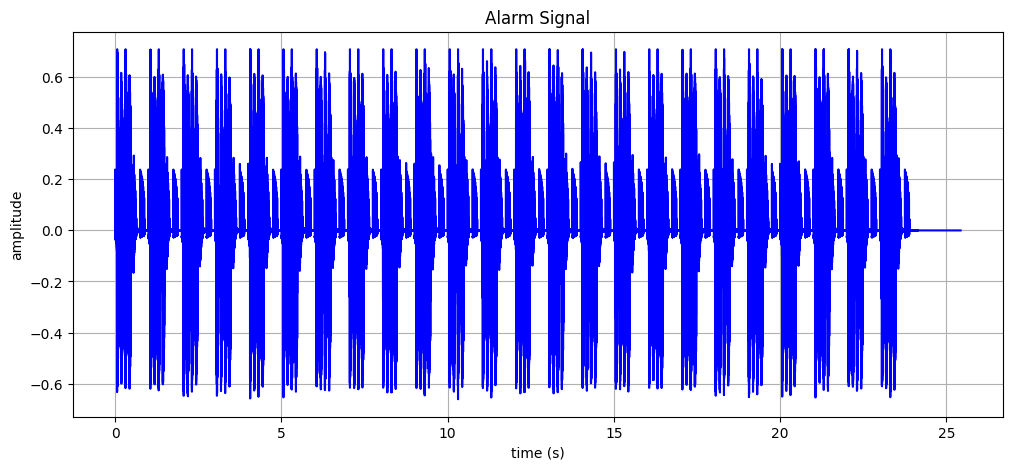

In [47]:
t = np.arange(0, len(alarm)) / sr
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.plot(t, alarm, color='blue', label='Original Signal')
ax.set(xlabel='time (s)', ylabel='amplitude',
       title='Alarm Signal')
ax.grid()

In [48]:
t = np.arange(0, len(alarm)/sr, 1/sr)

In [49]:
framed_alarms = librosa.util.frame(alarm, frame_length=5*sr, hop_length=4*sr).T
framed_ts = librosa.util.frame(t, frame_length=5*sr, hop_length=5*sr).T

In [19]:
framed_alarms[0]

array([-0.00059509, -0.00045776,  0.00045776, ..., -0.00038147,
       -0.00045776, -0.00028992], shape=(220500,), dtype=float32)

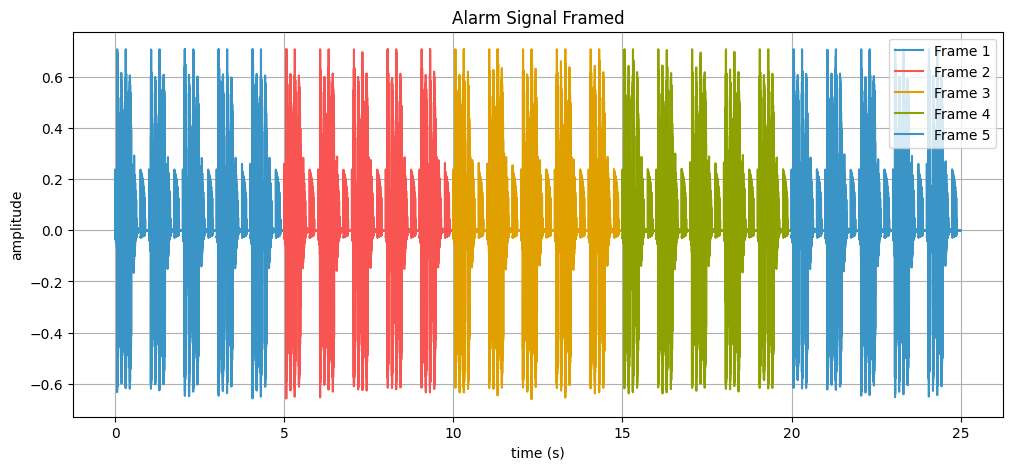

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
for i, (frame, t_frame) in enumerate(zip(framed_alarms, framed_ts)):
    color = next(color_cycle)
    ax.plot(t_frame, frame, color=color, label=f'Frame {i+1}')
    ax.set(xlabel='time (s)', ylabel='amplitude',
       title='Alarm Signal Framed')
    ax.legend()
    ax.grid()

## Konvolusi

### Konvolusi Dua Sinyal Sinus

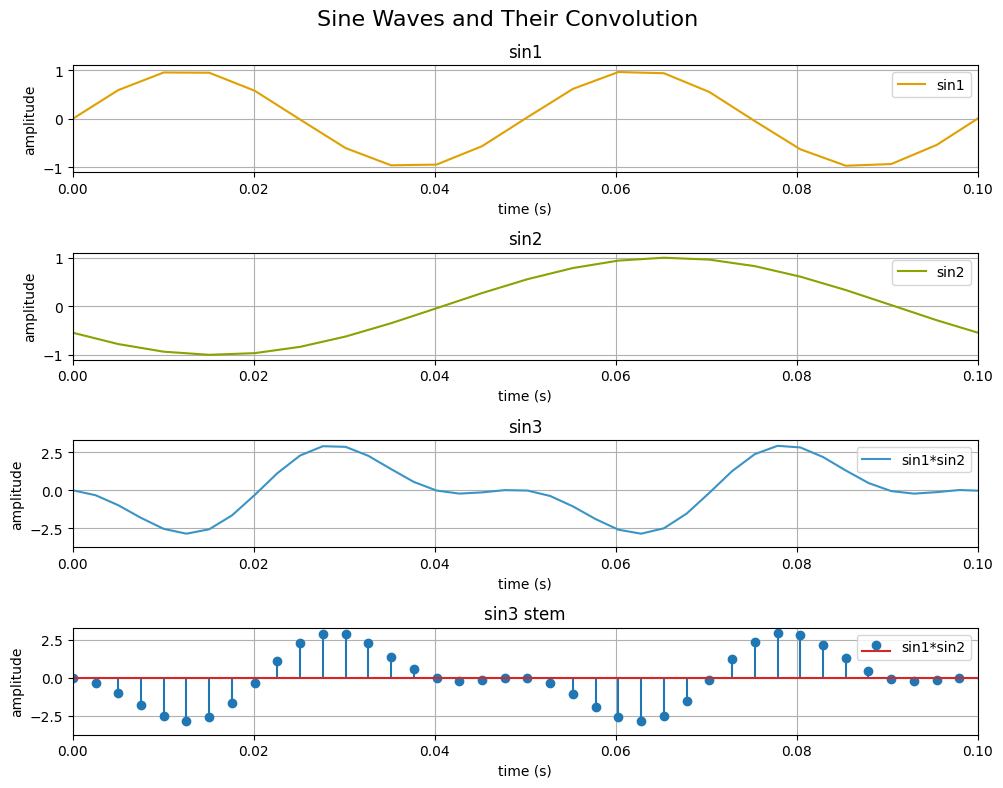

In [21]:
points = 200
f1 = 20
f2 = 10
theta1= 0
theta2= 10
t = np.linspace(0, 1, points)
sin1 = np.sin(2*np.pi*f1*t + theta1)
sin2 = np.sin(2*np.pi*f2*t + theta2)
sin3 = np.convolve(sin1, sin2)
t3 = np.linspace(0, 1, len(sin3))
fig, axs = plt.subplots(4,1)
fig.set_size_inches(10, 8)
fig.suptitle('Sine Waves and Their Convolution', fontsize=16)
axs = axs.ravel()

axs[0].plot(t, sin1, label='sin1', color=next(color_cycle))
axs[0].set_title('sin1')
axs[0].legend()
axs[0].grid()
axs[1].plot(t, sin2, label='sin2', color=next(color_cycle))
axs[1].set_title('sin2')
axs[1].legend()
axs[1].grid()
axs[2].plot(t3, sin3, label='sin1*sin2', color=next(color_cycle))
axs[2].set_title('sin3')
axs[2].legend()
axs[2].grid()
axs[3].stem(t3, sin3, label='sin1*sin2')
axs[3].set_title('sin3 stem')
axs[3].legend()
axs[3].grid()
for ax in axs:
    ax.set_xlabel('time (s)')
    ax.set_ylabel('amplitude')
    ax.set_xlim(0, 0.1)
plt.tight_layout()
plt.show()


#### Konvolusi Sinyal Diskrit Unit Step

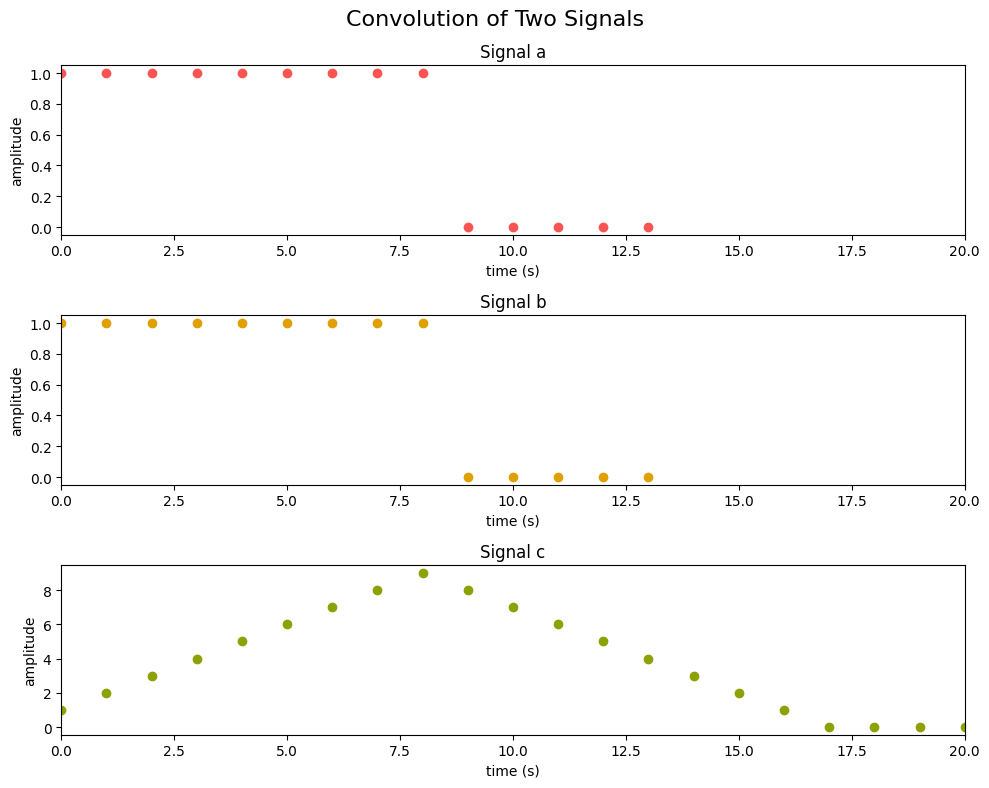

In [34]:
signal = [np.ones(9),np.zeros(5)]
signal = np.concatenate(signal)
a = signal
b = signal
c = np.convolve(a, b)
t = np.arange(0, len(c))
fig, axs = plt.subplots(3,1)
fig.set_size_inches(10, 8)
fig.suptitle('Convolution of Two Signals', fontsize=16)
axs[0].scatter(range(len(a)),a, color=next(color_cycle))
axs[0].set_title('Signal a')
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('amplitude')
axs[0].set_xlim(0, 20)
axs[1].scatter(range(len(b)),b, color=next(color_cycle))
axs[1].set_title('Signal b')
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('amplitude')
axs[1].set_xlim(0, 20)
axs[2].scatter(t,c, color=next(color_cycle))
axs[2].set_title('Signal c')
axs[2].set_xlabel('time (s)')
axs[2].set_ylabel('amplitude')
axs[2].set_xlim(0, 20)
plt.tight_layout()
plt.show()


#### Konvolusi Sinyal Bernoise dengan Raise Cosine

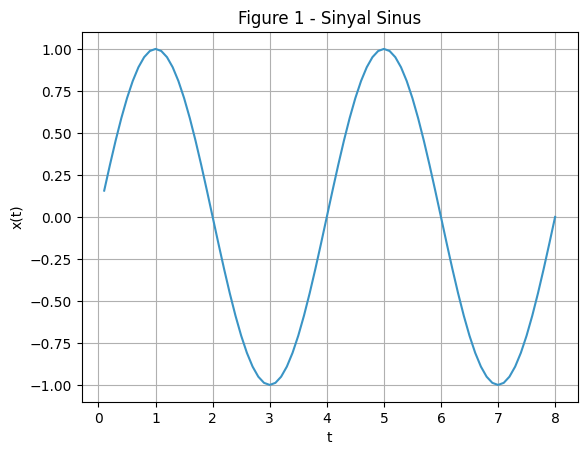

In [40]:
t = np.arange(0.1, 8.1, 0.1)
x = np.sin(2 * np.pi * t / 4)

plt.figure(1)
plt.plot(t, x, color=next(color_cycle))
plt.title("Figure 1 - Sinyal Sinus")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)


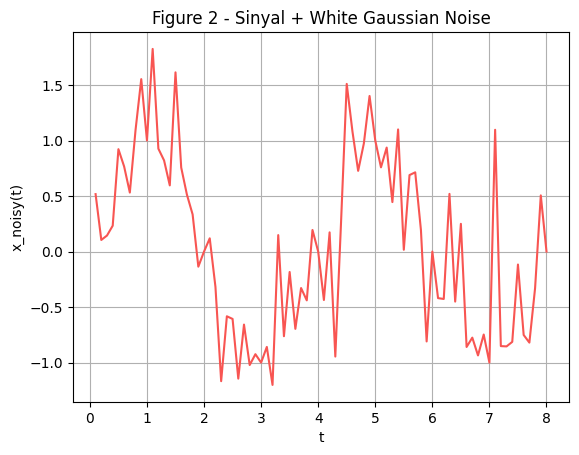

In [41]:
noise = 0.5 * np.random.randn(len(t)) * np.sin(2 * np.pi * 10 * t / 4) + \
        0.2 * np.random.randn(len(t)) * np.sin(2 * np.pi * 12 * t / 4)

x_noisy = x + noise

plt.figure(2)
plt.plot(t, x_noisy, color=next(color_cycle))
plt.title("Figure 2 - Sinyal + White Gaussian Noise")
plt.xlabel("t")
plt.ylabel("x_noisy(t)")
plt.grid(True)


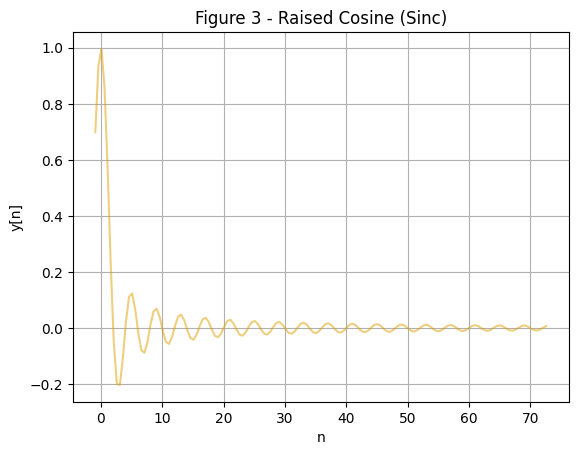

In [37]:
n = np.arange(-0.9, 8.1*9, 0.5)
y_sinc = np.sinc(4 * n / 8)

plt.figure(3)
# plt.stem(n, y_sinc, linefmt=f'{next(color_cycle)}', markerfmt=f'{next(color_cycle)}', basefmt=f'{next(color_cycle)}')
plt.plot(n, y_sinc, color=next(color_cycle), alpha=0.5)
plt.title("Figure 3 - Raised Cosine (Sinc)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)

plt.show()


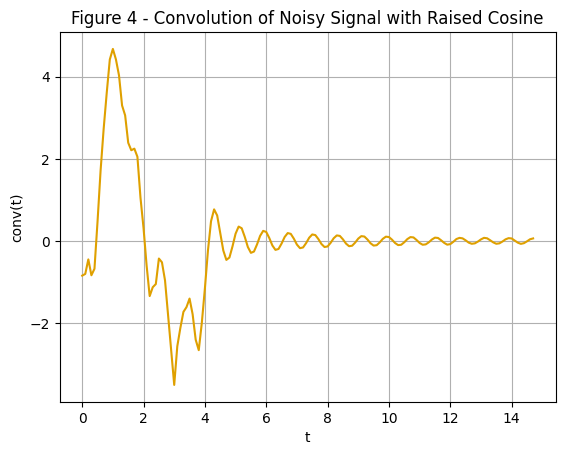

In [42]:
conv = np.convolve(x_noisy, y_sinc, mode='same')
t = np.arange(0, len(conv)) * 0.1
plt.figure(4)
plt.plot(t, conv, color=next(color_cycle))
plt.title("Figure 4 - Convolution of Noisy Signal with Raised Cosine")
plt.xlabel("t")
plt.ylabel("conv(t)")
plt.grid(True)
plt.show()

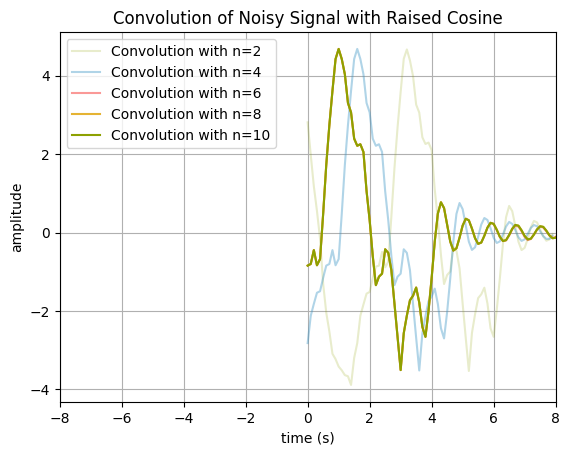

In [43]:
ns = [(i+1)*2 for i in range(0, 5)]
fig, ax = plt.subplots()
for n in ns:
    n_range= np.arange(-0.9, 8.1*n, 0.5)
    y_sinc = np.sinc(4 * n_range / 8)
    conv = np.convolve(x_noisy, y_sinc, mode='same')
    t = np.arange(0, len(conv)) / 10
    color = next(color_cycle)
    ax.plot(t, conv, color=color, label=f'Convolution with n={n}', alpha=n*0.1)
    ax.set(xlabel='time (s)', ylabel='amplitude',
           title='Convolution of Noisy Signal with Raised Cosine')
    ax.legend(loc='best')
    ax.grid()
    ax.set_xlim(-8, 8)
plt.show()